In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'DejaVu Sans'  # Reemplaza con una fuente disponible en tu sistema que admita caracteres especiales
plt.style.use('dark_background')



# Proyecto Final Spotify

Este proyecto es un análisis exploratorio de datos (AED) utilizando datos de Spotify.

Universidad Mayor de San Simón.

Diplomado de ESTADÍSTICA APLICADA A LA TOMA DE DECISIONES 3ra VERSIÓN, 2024.  

Módulo II - Ingeniería de Datos

Docente:  Msc. Ing. Danny Luis Huanca Sevilla 

Integrantes del Grupo:

- Callau Medrano Valeria 
- Mendez Claros Adriana 
- Terrazas Arce Valeria 
- Zambrana Sejas Alvaro 

In [3]:
def load_data():
    data = pd.read_csv('../data/merged_data_202407131635.csv', low_memory=False)
    return data


In [4]:
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

data = load_data()
data.head()

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,...,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
0,803,Reggaetón Lento (Bailemos),1,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Bolivia,top200,SAME_POSITION,6784.0,...,4.0,-3.073,0.0,0.0502,0.40000,0.000000,0.176,0.710,93.974,4.0
1,804,Otra vez (feat. J Balvin),2,2017-01-01,Zion & Lennox,https://open.spotify.com/track/3QwBODjSEzelZyV...,Bolivia,top200,SAME_POSITION,5748.0,...,10.0,-5.429,1.0,0.1000,0.05590,0.000486,0.440,0.704,96.016,4.0
2,805,Chantaje (feat. Maluma),3,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Bolivia,top200,SAME_POSITION,5506.0,...,8.0,-2.921,0.0,0.0776,0.18700,0.000030,0.159,0.907,102.034,4.0
3,806,Vente Pa' Ca (feat. Maluma),4,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Bolivia,top200,MOVE_UP,4804.0,...,11.0,-4.070,0.0,0.2260,0.00431,0.000017,0.101,0.533,99.935,4.0
4,807,Traicionera,5,2017-01-01,Sebastian Yatra,https://open.spotify.com/track/5J1c3M4EldCfNxX...,Bolivia,top200,MOVE_DOWN,4780.0,...,11.0,-4.933,1.0,0.0638,0.14200,0.000000,0.219,0.661,91.012,4.0


In [5]:
data.tail()

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,...,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
404508,26171071,Bad Habits,46,2021-07-31,Ed Sheeran,https://open.spotify.com/track/6PQ88X9TkUIAUIZ...,Bolivia,viral50,NEW_ENTRY,NaN,...,11.0,-3.712,0.0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,4.0
404509,26171072,Maviri,47,2021-07-31,Mont,https://open.spotify.com/track/2KbDqOveWc2vInJ...,Bolivia,viral50,MOVE_DOWN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404510,26171073,Running Away,48,2021-07-31,"VANO 3000, BADBADNOTGOOD, Samuel T. Herring",https://open.spotify.com/track/2lDODk7inZnmUHb...,Bolivia,viral50,MOVE_DOWN,NaN,...,7.0,-10.910,1.0,0.0408,0.6600,0.852000,0.1450,0.721,93.688,4.0
404511,26171074,Casualidad,49,2021-07-31,"Sofía Reyes, Pedro Capó",https://open.spotify.com/track/5FcT2TuosRkokjn...,Bolivia,viral50,NEW_ENTRY,NaN,...,10.0,-4.223,0.0,0.0987,0.3830,0.000000,0.0554,0.840,173.906,4.0
404512,26171075,Pieces,50,2021-07-31,AVAION,https://open.spotify.com/track/5H95n43z0KFcXGC...,Bolivia,viral50,NEW_ENTRY,NaN,...,4.0,-13.316,1.0,0.0620,0.8720,0.322000,0.1000,0.198,120.015,4.0


## Entendimiento de los datos

In [6]:
# renombrar la primera columna a chart_id
data.rename(columns={'Unnamed: 0': 'chart_id'}, inplace=True)
data_copy = data.copy()
data.columns

Index(['chart_id', 'title', 'rank', 'date', 'artist', 'url', 'region', 'chart',
       'trend', 'streams', 'track_id', 'album', 'popularity', 'duration_ms',
       'explicit', 'release_date', 'available_markets', 'af_danceability',
       'af_energy', 'af_key', 'af_loudness', 'af_mode', 'af_speechiness',
       'af_acousticness', 'af_instrumentalness', 'af_liveness', 'af_valence',
       'af_tempo', 'af_time_signature'],
      dtype='object')

In [7]:
# definir la variable objetivo 'popularity'

data['popularity'].describe()

count    402031.000000
mean         54.175805
std          27.880608
min           0.000000
25%          49.000000
50%          65.000000
75%          73.000000
max          91.000000
Name: popularity, dtype: float64

## Descripción de Variables del Dataset de Spotify Charts

| Variable      | Descripción                                                                                 |
|---------------|---------------------------------------------------------------------------------------------|
| `chart_id`    | Identificador único del gráfico en el que aparece la canción.                               |
| `title`       | Título de la canción.                                                                       |
| `rank`        | Posición de la canción en el gráfico.                                                       |
| `date`        | Fecha en que la canción apareció en el gráfico.                                             |
| `artist`      | Nombre del artista que interpreta la canción.                                               |
| `trend`       | Tendencia de la canción en el gráfico (por ejemplo, subiendo, bajando, misma posición).     |
| `streams`     | Número de veces que la canción ha sido reproducida.                                         |
| `track_id`    | Identificador único de la pista en Spotify.                                                 |
| `album`       | Nombre del álbum al que pertenece la canción.                                               |
| `popularity`  | Popularidad de la canción en una escala de 0 a 100, donde 100 es la más popular.            |
| `duration_ms` | Duración de la canción en milisegundos.                                                     |
| `explicit`    | Indica si la canción contiene lenguaje explícito (1 para sí, 0 para no).                    |

## Descripción de Variables de Audio Features

| Variable             | Descripción                                                                                 |
|----------------------|---------------------------------------------------------------------------------------------|
| `af_danceability`    | Describe qué tan apta es una pista para bailar. Combina elementos como tempo, estabilidad del ritmo, fuerza del beat y regularidad general. Los valores van de 0.0 (menos bailable) a 1.0 (más bailable). |
| `af_energy`          | Una medida de intensidad y actividad. Las pistas con alta energía suelen sentirse rápidas, ruidosas y ruidosas. Los valores van de 0.0 (menos energético) a 1.0 (más energético). |
| `af_key`             | La clave musical de la pista. Integra 12 posibles valores, que van del 0 al 11, correspondientes a las 12 notas estándar en la escala musical occidental. |
| `af_loudness`        | El nivel de volumen promedio de la pista en decibelios (dB). Los valores son típicamente entre -60 y 0 dB, donde 0 dB es el más fuerte. |
| `af_mode`            | Indica si la pista está en un modo mayor (1) o menor (0). Se refiere a la escala musical de la pista. |
| `af_speechiness`     | Detecta la presencia de palabras habladas en una pista. Valores altos indican más contenido hablado. Valores cercanos a 1.0 indican mayor presencia de palabras. |
| `af_acousticness`    | Una medida de confianza que predice si la pista es acústica. Los valores cercanos a 1.0 son más probables de ser acústicos. |
| `af_instrumentalness`| Predice si una pista no contiene vocales. Cuanto más cerca de 1.0, más probable es que la pista no tenga contenido vocal. Valores superiores a 0.5 sugieren que la pista es instrumental. |
| `af_liveness`        | Detecta la presencia de una audiencia en la grabación. Valores más altos indican mayor probabilidad de que la pista fue grabada en vivo. Valores superiores a 0.8 representan una alta probabilidad de que la pista sea en vivo. |
| `af_valence`         | Una medida de la positividad musical transmitida por una pista. Valores altos representan música que suena más positiva (feliz, alegre, eufórica), mientras que valores bajos representan música más negativa (triste, deprimida, enojada). |
| `af_tempo`           | El tempo general de la pista en beats por minuto (BPM). Valores más altos indican un tempo más rápido. |
| `af_time_signature`  | Un valor entero que indica el número de pulsos por compás en la pista. Normalmente tiene valores de 3, 4 o 5, que son los tiempos más comunes en la música moderna. |


In [8]:
data.dtypes

chart_id                 int64
title                   object
rank                     int64
date                    object
artist                  object
url                     object
region                  object
chart                   object
trend                   object
streams                float64
track_id                object
album                   object
popularity             float64
duration_ms            float64
explicit                object
release_date            object
available_markets       object
af_danceability        float64
af_energy              float64
af_key                 float64
af_loudness            float64
af_mode                float64
af_speechiness         float64
af_acousticness        float64
af_instrumentalness    float64
af_liveness            float64
af_valence             float64
af_tempo               float64
af_time_signature      float64
dtype: object

In [9]:
# convertir la columna 'date' a datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# drop these columns region, chart, available_markets, url
data = data.drop(columns=['region', 'chart', 'available_markets', 'url', 'release_date'])

data.columns

Index(['chart_id', 'title', 'rank', 'date', 'artist', 'trend', 'streams',
       'track_id', 'album', 'popularity', 'duration_ms', 'explicit',
       'af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_mode',
       'af_speechiness', 'af_acousticness', 'af_instrumentalness',
       'af_liveness', 'af_valence', 'af_tempo', 'af_time_signature'],
      dtype='object')

In [10]:
# crear un dataframe con el tipo de variable de cada columna desde una perspectiva de estadistica descriptiva

data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])

# agregar una columna y edintificar si la columna es cualitativa o cuantitativa

tipo_de_variables = {
    "title": "Cualitativa",
    "rank": "Cualitativa",
    "date": "Cualitativa",
    "artist": "Cualitativa",
    "trend": "Cualitativa",
    "streams": "Cuantitativa",
    "track_id": "Cualitativa",
    "album": "Cualitativa",
    "popularity": "Cuantitativa",
    "duration_ms": "Cuantitativa",
    "explicit": "Cualitativa",
    "af_danceability": "Cuantitativa",
    "af_energy": "Cuantitativa",
    "af_key": "Cualitativa",
    "af_loudness": "Cuantitativa",
    "af_mode": "Cualitativa",
    "af_speechiness": "Cuantitativa",
    "af_acousticness": "Cuantitativa",
    "af_instrumentalness": "Cuantitativa",
    "af_liveness": "Cuantitativa",
    "af_valence": "Cuantitativa",
    "af_tempo": "Cuantitativa",
    "af_time_signature": "Cualitativa"
}

variable_types_df = pd.DataFrame(list(tipo_de_variables.items()), columns=["Variable", "Tipo de Variable"])

variable_types_df

,Variable,Tipo de Variable
0,title,Cualitativa
1,rank,Cualitativa
2,date,Cualitativa
3,artist,Cualitativa
4,trend,Cualitativa
5,streams,Cuantitativa
6,track_id,Cualitativa
7,album,Cualitativa
8,popularity,Cuantitativa
9,duration_ms,Cuantitativa


In [11]:
## Análisis de valores faltantes

In [12]:
print(data.isnull().sum())


chart_id                   0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                90664
track_id                2482
album                   2501
popularity              2482
duration_ms             2482
explicit                2482
af_danceability         2482
af_energy               2482
af_key                  2482
af_loudness             2482
af_mode                 2482
af_speechiness          2482
af_acousticness         2482
af_instrumentalness     2482
af_liveness             2482
af_valence              2482
af_tempo                2482
af_time_signature       2482
dtype: int64


In [13]:
print(data.isna().sum())

chart_id                   0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                90664
track_id                2482
album                   2501
popularity              2482
duration_ms             2482
explicit                2482
af_danceability         2482
af_energy               2482
af_key                  2482
af_loudness             2482
af_mode                 2482
af_speechiness          2482
af_acousticness         2482
af_instrumentalness     2482
af_liveness             2482
af_valence              2482
af_tempo                2482
af_time_signature       2482
dtype: int64


In [14]:
# remover filas con valores faltantes en las columnas 'af_'
af_columns = [col for col in data.columns if col.startswith('af_')]

data = data.dropna(subset=af_columns)

data.shape

(402031, 24)

In [15]:
print(data.isnull().sum())

chart_id                   0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                88188
track_id                   0
album                     19
popularity                 0
duration_ms                0
explicit                   0
af_danceability            0
af_energy                  0
af_key                     0
af_loudness                0
af_mode                    0
af_speechiness             0
af_acousticness            0
af_instrumentalness        0
af_liveness                0
af_valence                 0
af_tempo                   0
af_time_signature          0
dtype: int64


In [16]:
print(data.isna().sum())


chart_id                   0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                88188
track_id                   0
album                     19
popularity                 0
duration_ms                0
explicit                   0
af_danceability            0
af_energy                  0
af_key                     0
af_loudness                0
af_mode                    0
af_speechiness             0
af_acousticness            0
af_instrumentalness        0
af_liveness                0
af_valence                 0
af_tempo                   0
af_time_signature          0
dtype: int64


In [17]:
data.dtypes

chart_id                        int64
title                          object
rank                            int64
date                   datetime64[ns]
artist                         object
trend                          object
streams                       float64
track_id                       object
album                          object
popularity                    float64
duration_ms                   float64
explicit                       object
af_danceability               float64
af_energy                     float64
af_key                        float64
af_loudness                   float64
af_mode                       float64
af_speechiness                float64
af_acousticness               float64
af_instrumentalness           float64
af_liveness                   float64
af_valence                    float64
af_tempo                      float64
af_time_signature             float64
dtype: object

In [18]:
data.shape

(402031, 24)

# HIPOTESIS

Todos los audio_fetures (similaridad), streams (frencuencia de escucha) y popularidad de la cancion estan relacionados. 
Probablemente: popularity

Variable Y = 
Opcion 1:

Popularidad de la cancion, 0 - 5, Score? 

Opcion 2:
0 o 1

Variables X = audio_features, streams

# Univariado

In [19]:
print(data.columns)

Index(['chart_id', 'title', 'rank', 'date', 'artist', 'trend', 'streams',
       'track_id', 'album', 'popularity', 'duration_ms', 'explicit',
       'af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_mode',
       'af_speechiness', 'af_acousticness', 'af_instrumentalness',
       'af_liveness', 'af_valence', 'af_tempo', 'af_time_signature'],
      dtype='object')


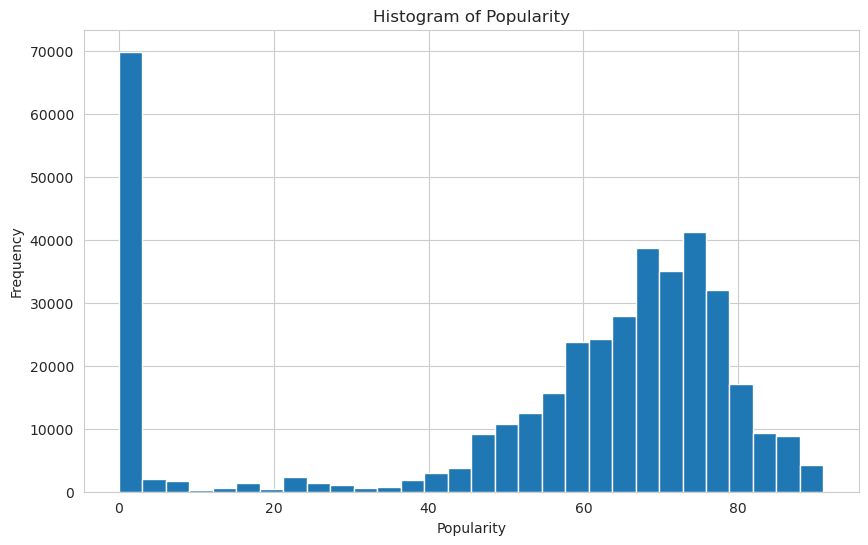

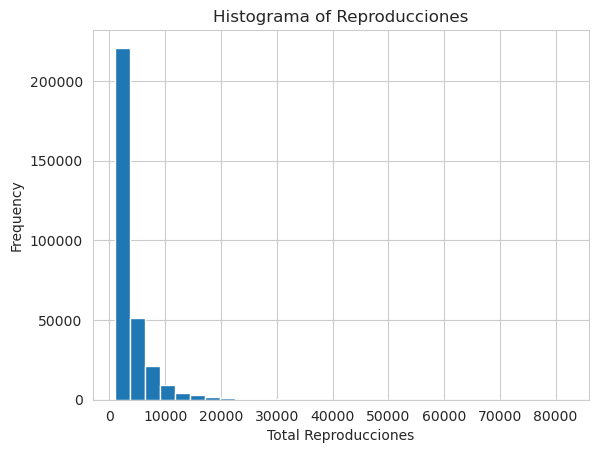

In [20]:
# plot a histogram of the column 'popularity'
# dibujar un boxplot de la columna 'popularity' y 'streams'

plt.figure(figsize=(10, 6))

plt.hist(data['popularity'], bins=30)

plt.xlabel('Popularity')

plt.ylabel('Frequency')

plt.title('Histogram of Popularity')

plt.show()


plt.hist(data['streams'], bins=30)

plt.xlabel('Total Reproducciones')

plt.ylabel('Frequency')

plt.title('Histograma of Reproducciones')

plt.show()

In [21]:
# realizar análisis univariado de las variables 'streams' y 'popularity'

data[['streams', 'popularity']].describe()

,streams,popularity
count,313843.000000,402031.000000
mean,3731.006634,54.175805
std,3543.268425,27.880608
min,1001.000000,0.000000
25%,1796.000000,49.000000
50%,2629.000000,65.000000
75%,4142.000000,73.000000
max,81858.000000,91.000000


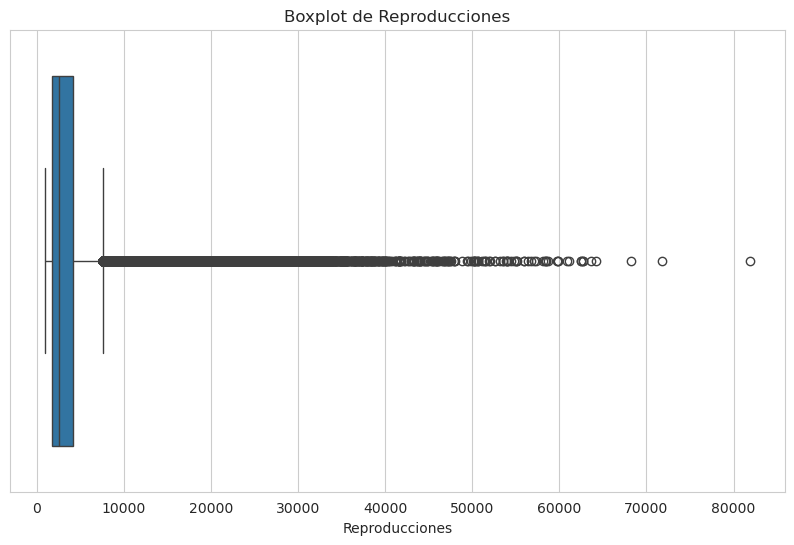

In [22]:
# Boxplot para la variable 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['streams'])
plt.title('Boxplot de Reproducciones')
plt.xlabel('Reproducciones')
plt.show()


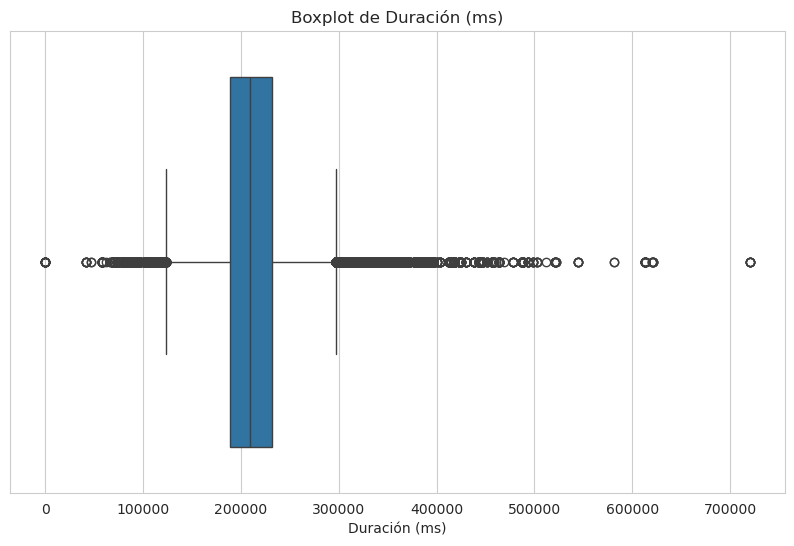

In [23]:
# Boxplot para la variable 'duration_ms'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['duration_ms'])
plt.title('Boxplot de Duración (ms)')
plt.xlabel('Duración (ms)')
plt.show()

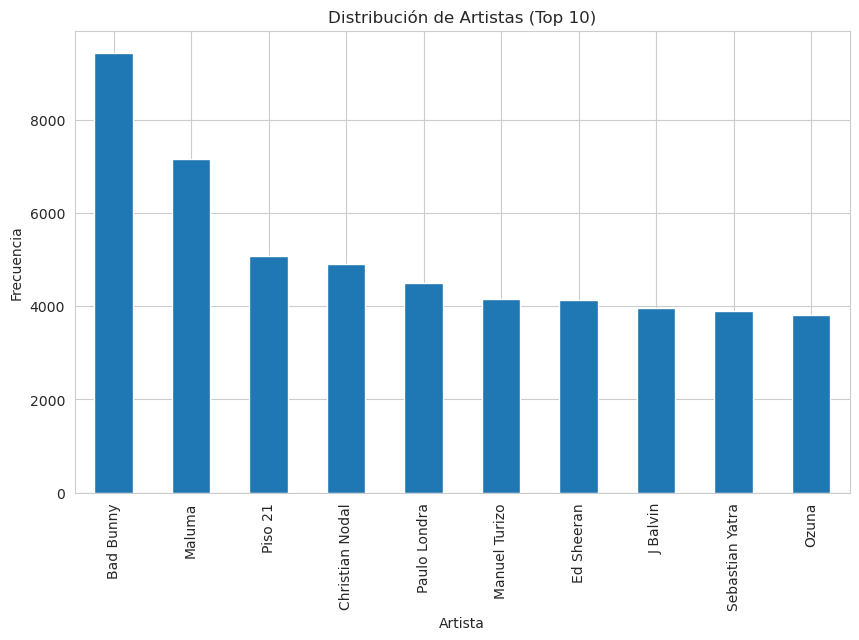

In [24]:
# Diagrama de barras
plt.figure(figsize=(10, 6))
data['artist'].value_counts().head(10).plot(kind='bar')
plt.title('Distribución de Artistas (Top 10)')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.show()


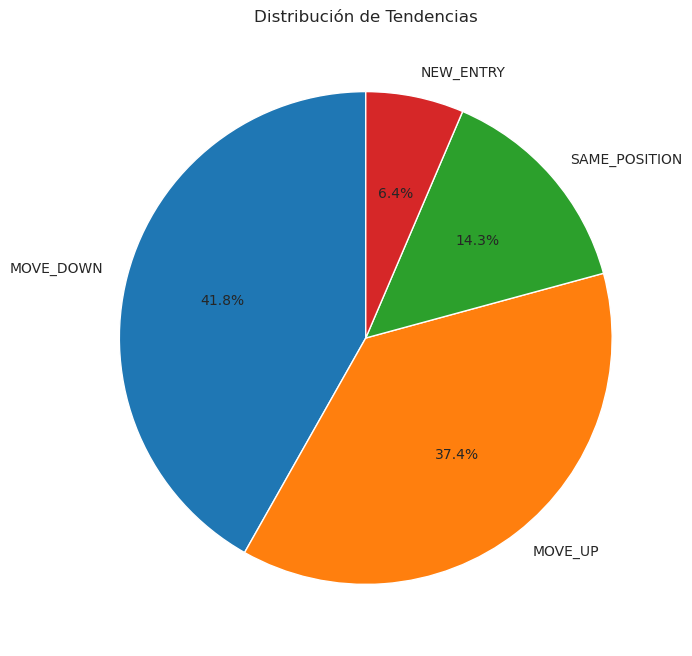

In [25]:
plt.figure(figsize=(8, 8))
data['trend'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Tendencias')
plt.ylabel('')
plt.show()

In [26]:
# Seleccionar las columnas numéricas
numerical_columns = ['rank', 'streams', 'popularity', 'duration_ms', 
                     'af_danceability', 'af_energy', 'af_loudness', 'af_speechiness', 
                     'af_acousticness', 'af_instrumentalness', 'af_liveness', 'af_valence', 'af_tempo']

# Calcular medidas de tendencia central y dispersión para las variables numéricas
numerical_summary = data[numerical_columns].describe()
numerical_summary

,rank,streams,popularity,duration_ms,af_danceability,af_energy,af_loudness,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo
count,402031.000000,313843.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000,402031.000000
mean,76.899617,3731.006634,54.175805,214391.335108,0.722208,0.684192,-5.202754,0.111460,0.239307,0.007743,0.163556,0.616973,123.736793
std,56.935098,3543.268425,27.880608,42649.001311,0.114145,0.145872,2.107969,0.087719,0.213247,0.064891,0.122732,0.208677,34.804272
min,1.000000,1001.000000,0.000000,0.000000,0.078300,0.018800,-30.663000,0.023100,0.000006,0.000000,0.019000,0.032000,48.936000
25%,28.000000,1796.000000,49.000000,188560.000000,0.672000,0.603000,-6.169000,0.051200,0.072800,0.000000,0.089700,0.478000,94.059000
50%,62.000000,2629.000000,65.000000,209180.000000,0.743000,0.709000,-4.791000,0.077900,0.178000,0.000000,0.118000,0.652000,109.326000
75%,121.000000,4142.000000,73.000000,231848.000000,0.800000,0.790000,-3.855000,0.140000,0.346000,0.000018,0.195000,0.780000,160.007000
max,200.000000,81858.000000,91.000000,720000.000000,0.980000,0.999000,1.509000,0.884000,0.995000,0.981000,0.980000,0.982000,214.131000


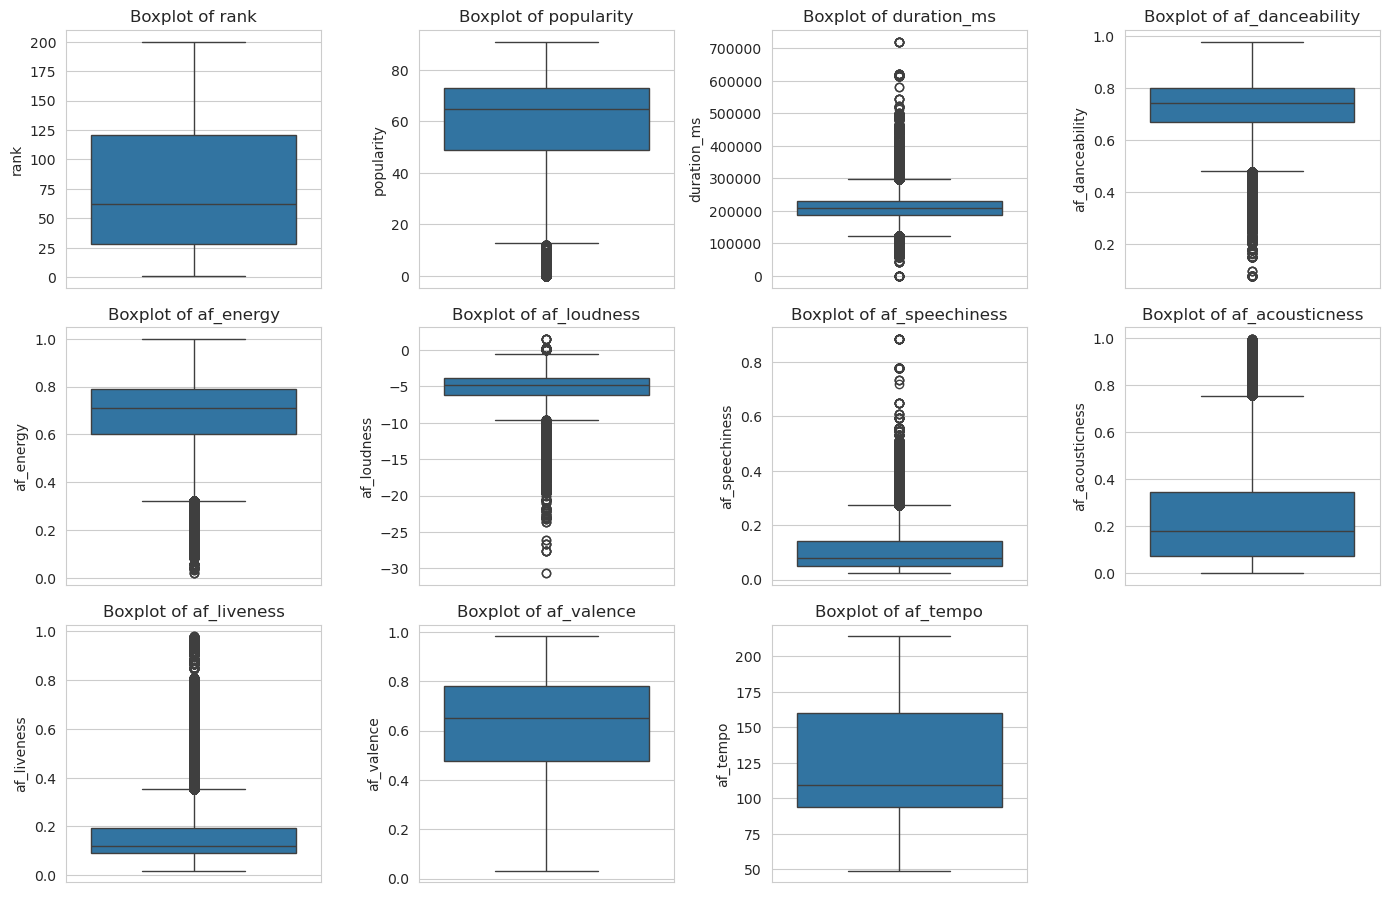

In [27]:
numerical_columns = ['rank', 'popularity', 'duration_ms', 
                     'af_danceability', 'af_energy', 'af_loudness', 'af_speechiness', 
                     'af_acousticness', 'af_liveness', 'af_valence', 'af_tempo']

# dibujar boxplots de las variables numéricas 

plt.figure(figsize=(14, 12))

for i, col in enumerate(numerical_columns):
    
    plt.subplot(4, 4, i + 1)
    
    sns.boxplot(data[col])
    
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


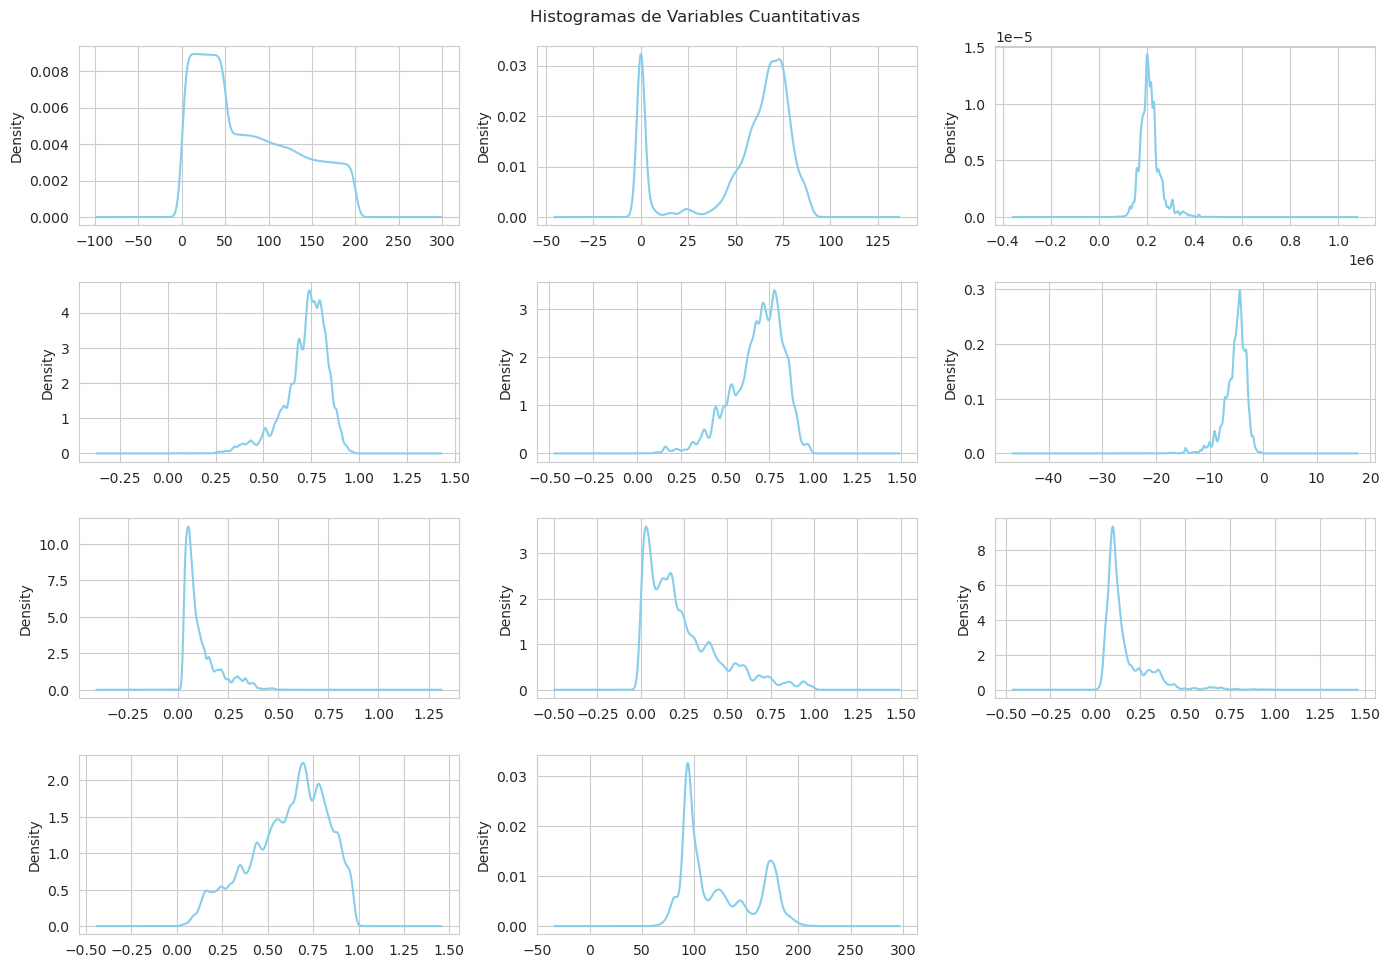

In [28]:
data[numerical_columns].plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(14, 12), color='skyblue', legend=False)

plt.suptitle('Histogramas de Variables Cuantitativas')
plt.tight_layout()

plt.show()

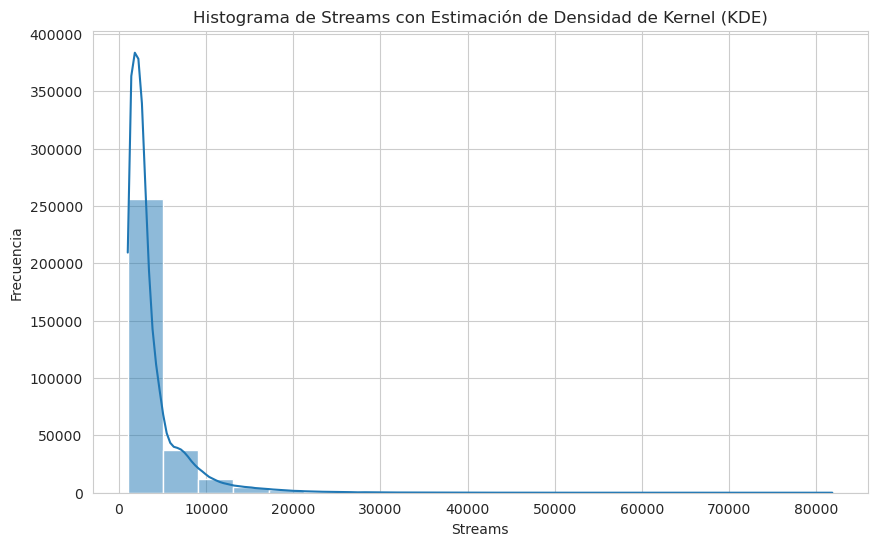

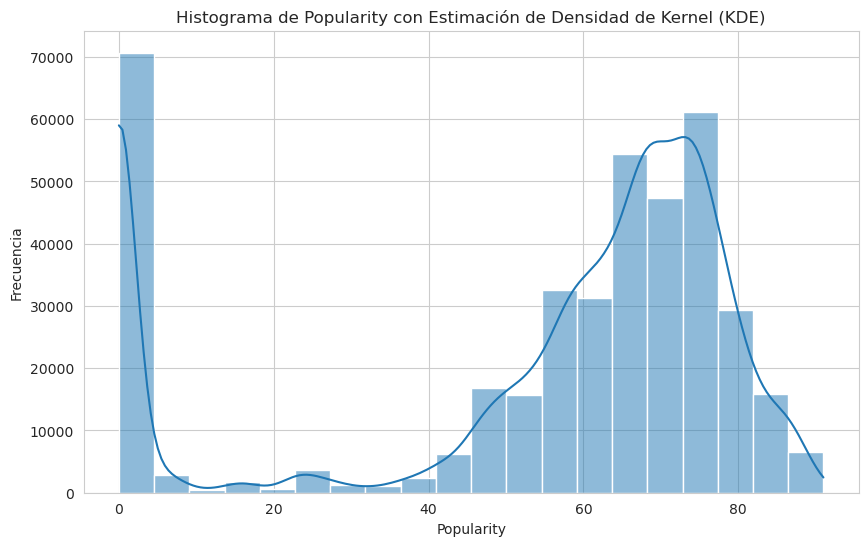

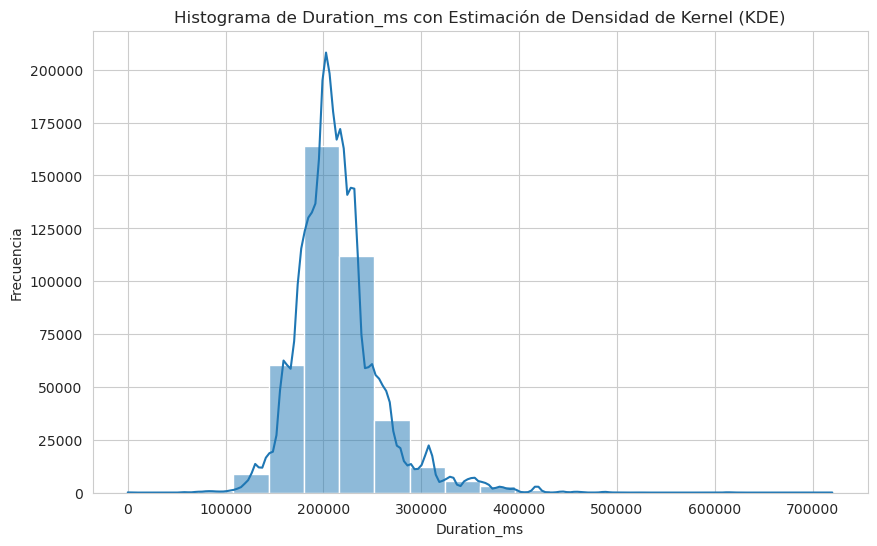

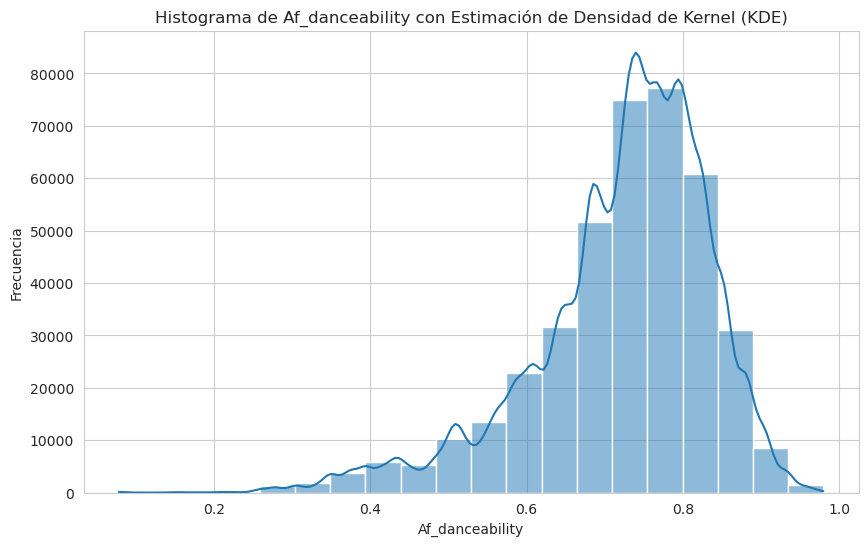

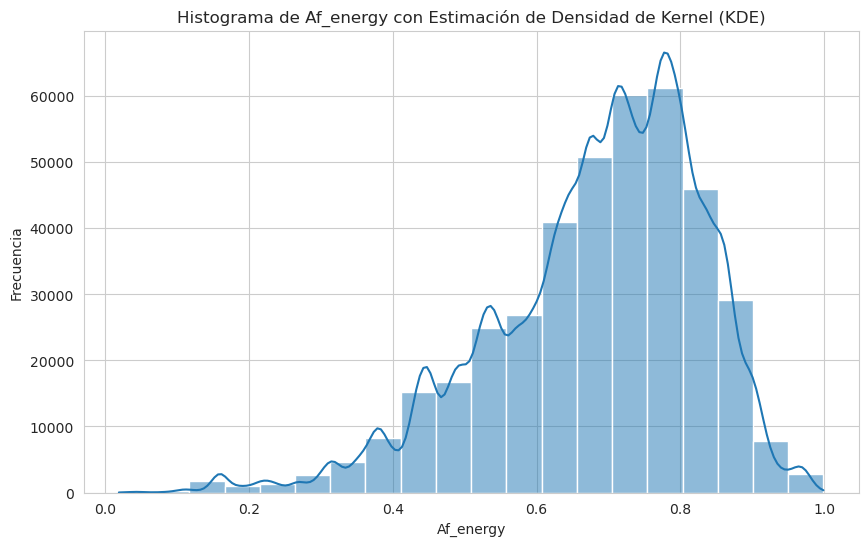

In [29]:
# Lista de columnas numéricas que deseas analizar
numerical_columns = ['streams', 'popularity', 'duration_ms', 'af_danceability', 'af_energy']

# Crear histogramas con KDE para cada columna numérica
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histograma de {col.capitalize()} con Estimación de Densidad de Kernel (KDE)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frecuencia')
    plt.show()

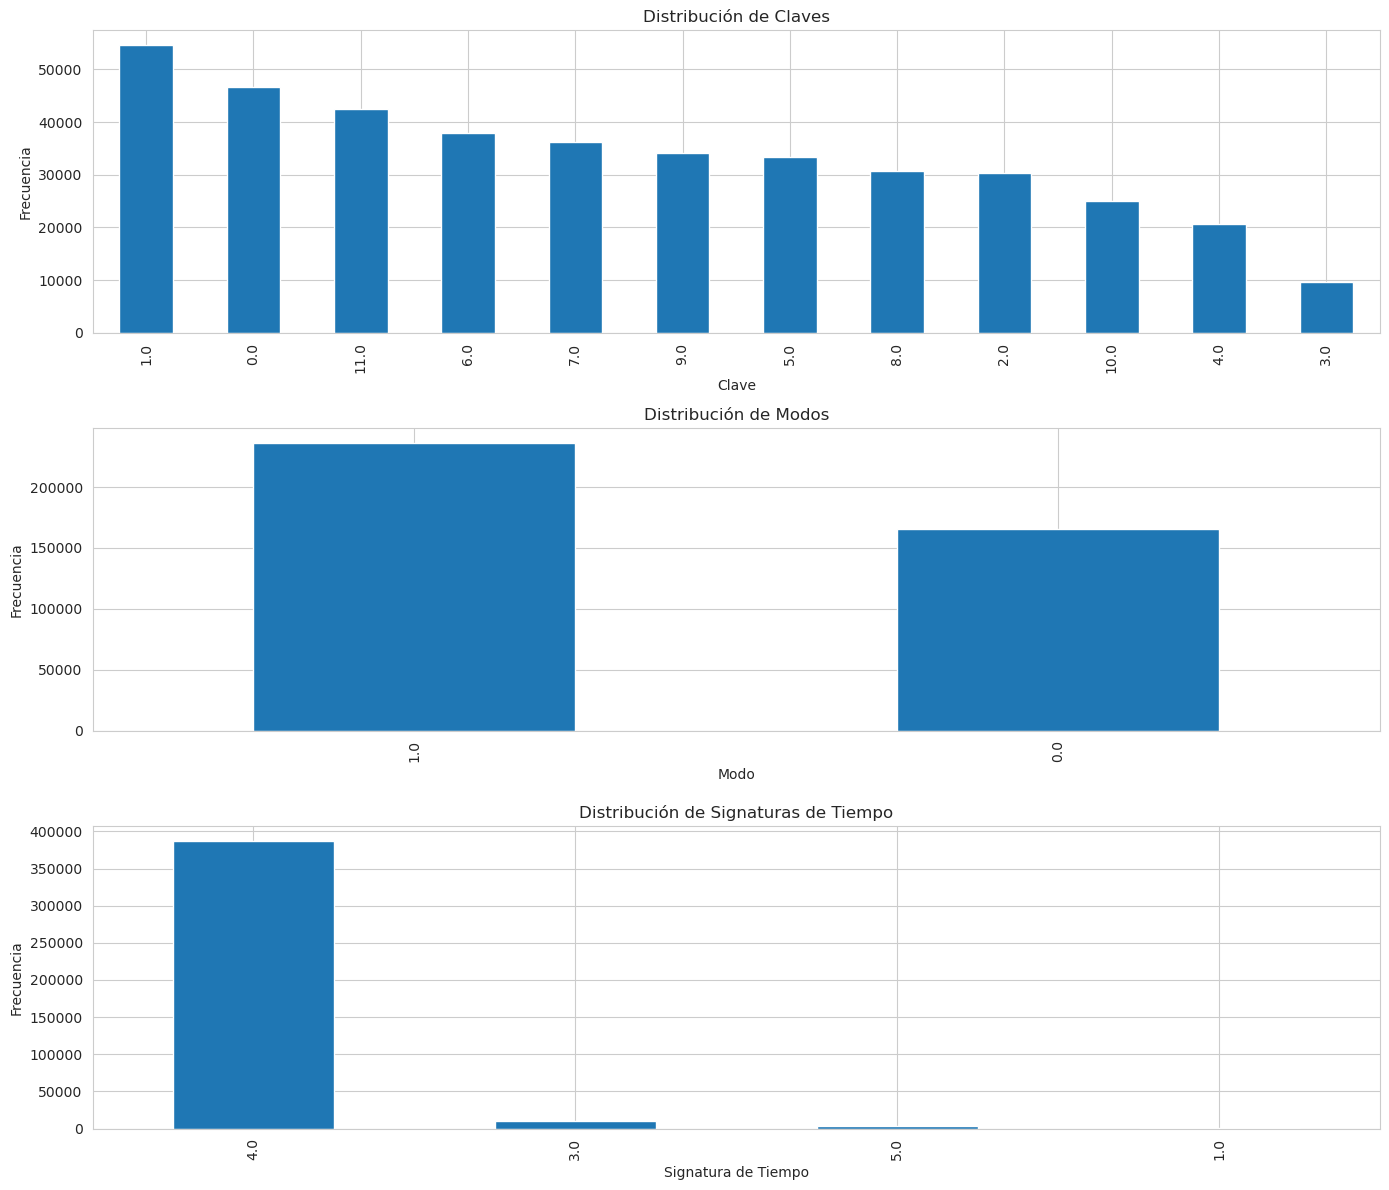

In [30]:
# diagrama de barras para af_key, af_mode, af_time_signature

plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)

data['af_key'].value_counts().plot(kind='bar')

plt.title('Distribución de Claves')

plt.xlabel('Clave')

plt.ylabel('Frecuencia')

plt.subplot(3, 1, 2)

data['af_mode'].value_counts().plot(kind='bar')

plt.title('Distribución de Modos')

plt.xlabel('Modo')

plt.ylabel('Frecuencia')

plt.subplot(3, 1, 3)

data['af_time_signature'].value_counts().plot(kind='bar')

plt.title('Distribución de Signaturas de Tiempo')

plt.xlabel('Signatura de Tiempo')

plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()


In [31]:
# Bivariado

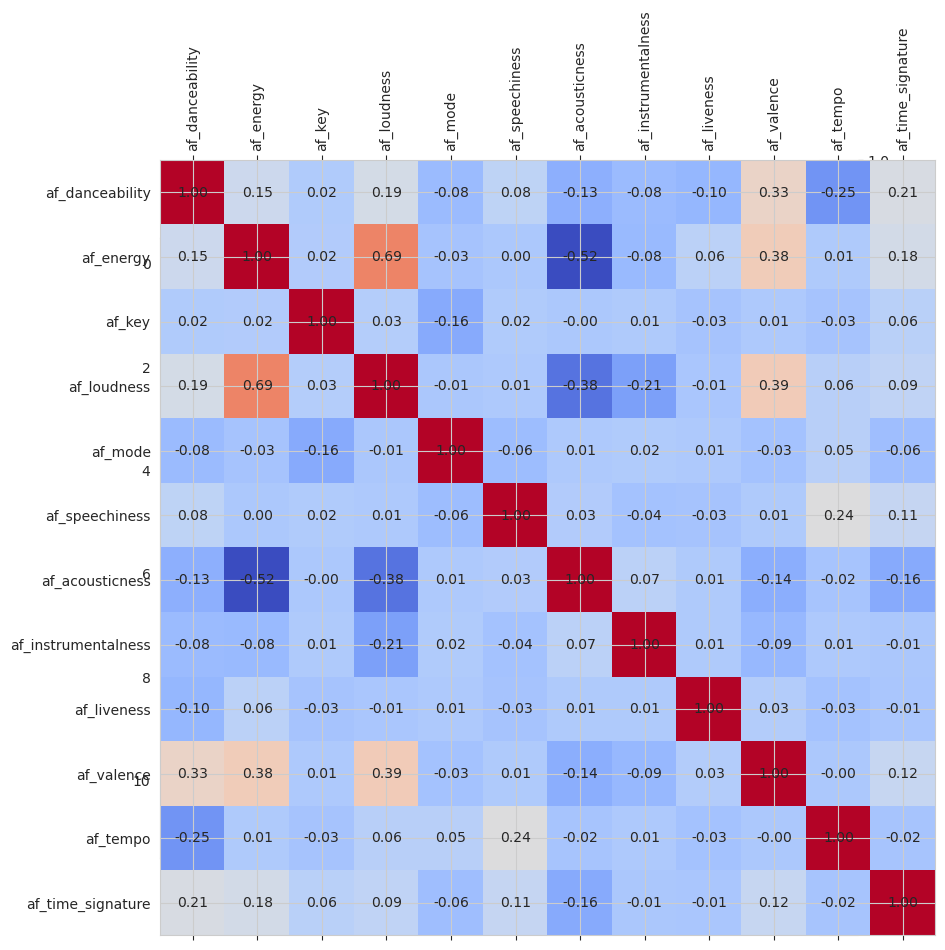

In [32]:
# filter columns starting with 'af_'

af_columns = [col for col in data.columns if col.startswith('af_')]

# do a correlation matrix of these columns using pearson correlation

correlation_matrix = data[af_columns].corr(method='pearson')

# plot a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
plt.matshow(correlation_matrix, fignum=1)


plt.colorbar()

plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')

plt.xticks(range(len(af_columns)), af_columns, rotation='vertical')

plt.yticks(range(len(af_columns)), af_columns)

# put annotations with the numbers

for i in range(len(af_columns)):
    for j in range(len(af_columns)):
        plt.text(i, j, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center')
      
plt.show()



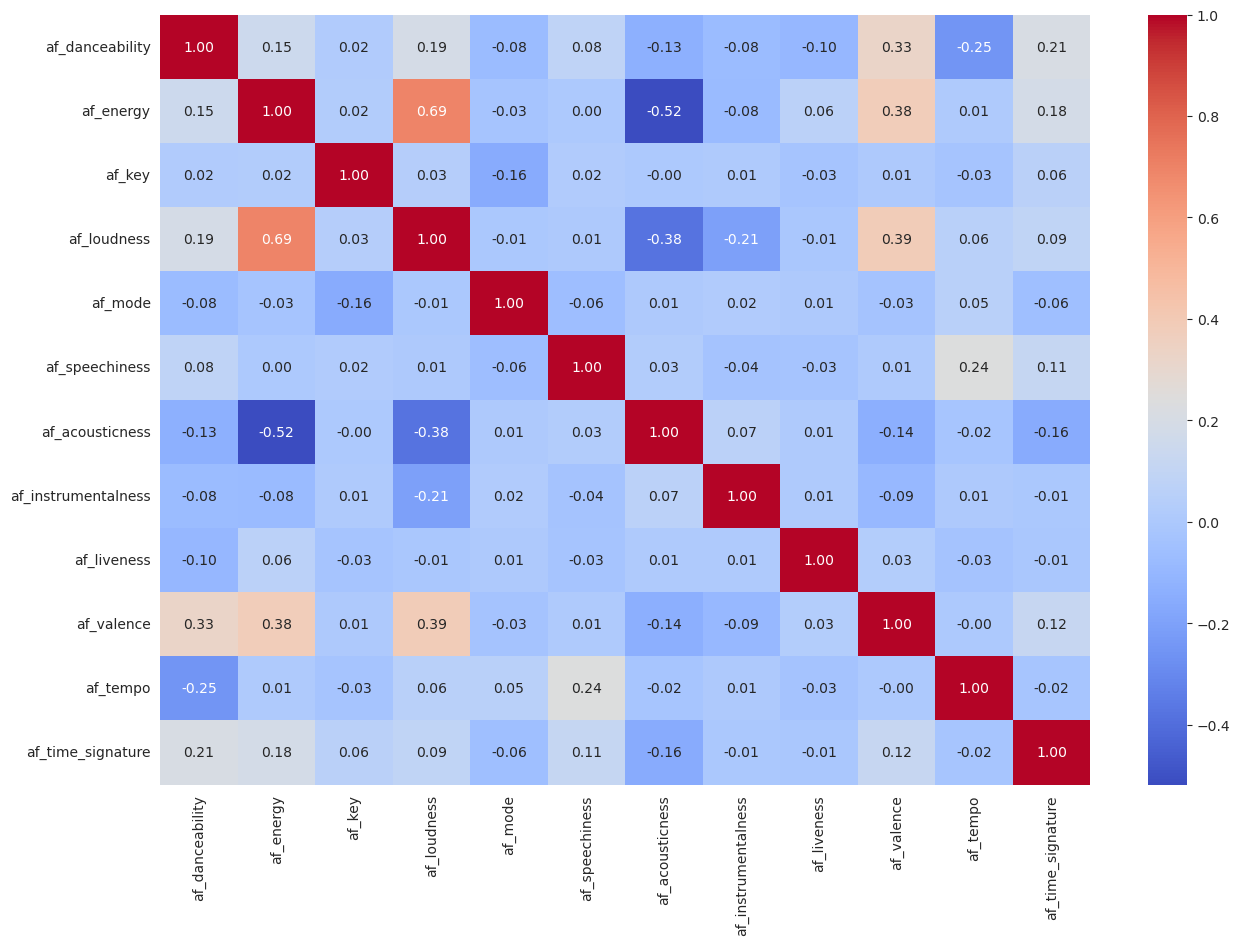

In [33]:
# use seaborn to plot a heatmap of the correlation matrix

import seaborn as sns

plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

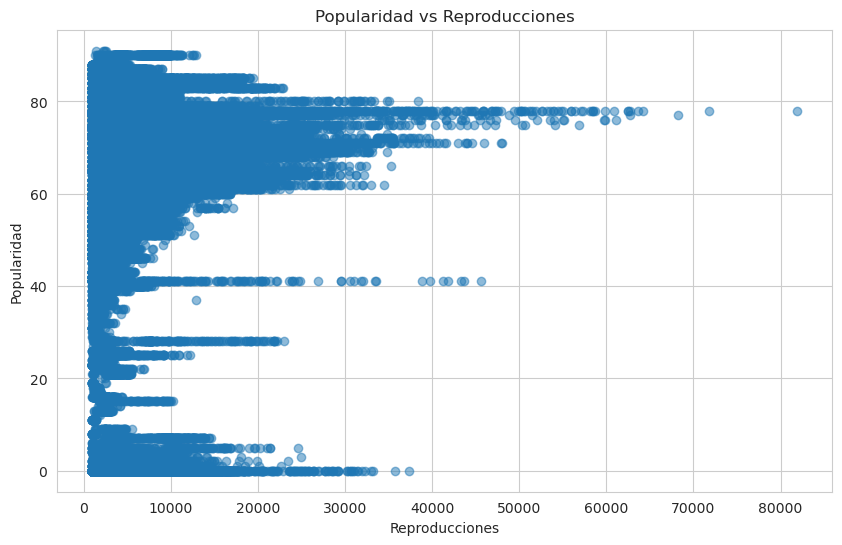

In [35]:
# scatter plot of 'popularity' vs 'streams'

plt.figure(figsize=(10, 6))

plt.scatter(data['streams'], data['popularity'], alpha=0.5)

plt.xlabel('Reproducciones')

plt.ylabel('Popularidad')

plt.title('Popularidad vs Reproducciones')

plt.show()

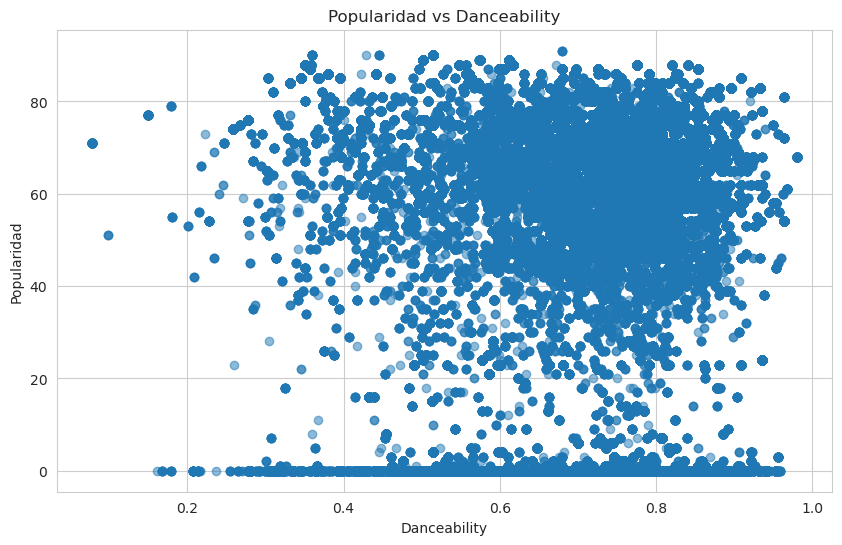

In [36]:
# scatter plot of 'popularity' vs 'af_danceability'

plt.figure(figsize=(10, 6))

plt.scatter(data['af_danceability'], data['popularity'], alpha=0.5)

plt.xlabel('Danceability')

plt.ylabel('Popularidad')

plt.title('Popularidad vs Danceability')

plt.show()


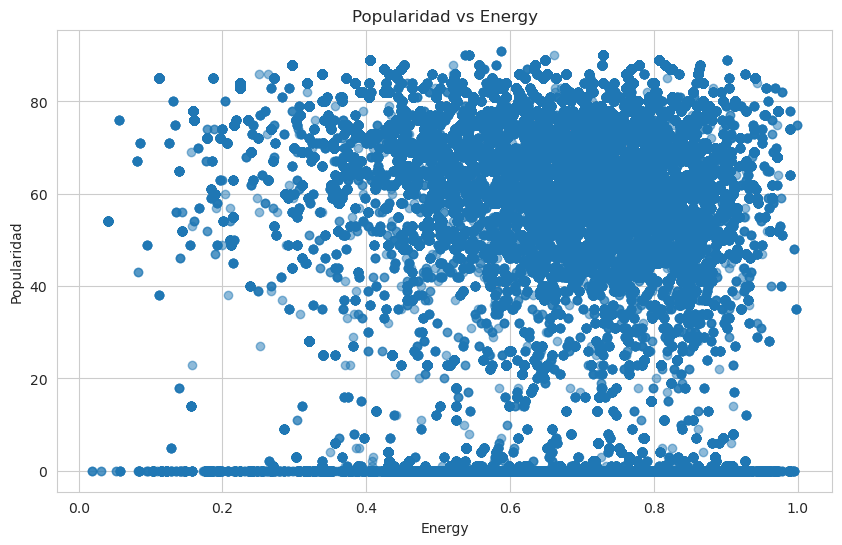

In [37]:
# scatter plot of 'popularity' vs 'af_energy'

plt.figure(figsize=(10, 6))

plt.scatter(data['af_energy'], data['popularity'], alpha=0.5)

plt.xlabel('Energy')

plt.ylabel('Popularidad')

plt.title('Popularidad vs Energy')

plt.show()


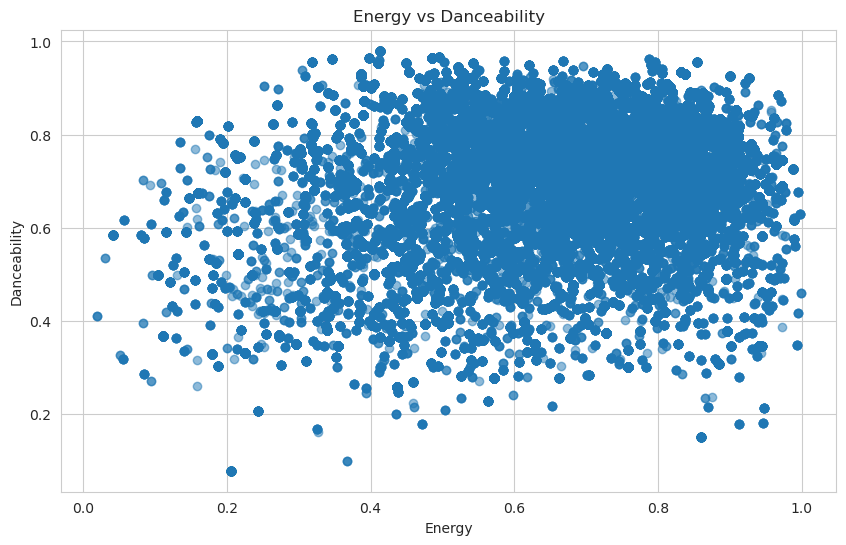

In [38]:
# scatter plot of 'af_energy' vs 'af_danceability'

plt.figure(figsize=(10, 6))

plt.scatter(data['af_energy'], data['af_danceability'], alpha=0.5)

plt.xlabel('Energy')

plt.ylabel('Danceability')

plt.title('Energy vs Danceability')

plt.show()